In [1]:
#import conda
import tqdm as notebook_tqdm
import shap
import numpy as np
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from interpret.glassbox import ExplainableBoostingClassifier
from interpret.privacy import DPExplainableBoostingClassifier, DPExplainableBoostingRegressor
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
from interpret.glassbox import ClassificationTree
from interpret import show
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
def plot_confusion_matrix(cm, classes=[],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, figsize_val=6.5):

    fig=plt.figure(figsize=(figsize_val,figsize_val))
    plt.imshow(cm, interpolation='none', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,ha='right')
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [3]:
# generate synthetic dataset
X,y = shap.datasets.iris()
feature_names = list(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# Train the model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

# Evaluate the model
y_pred = model.predict(xgboost.DMatrix(X_test, label=y_test))
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_test)



Accuracy: 93.33%


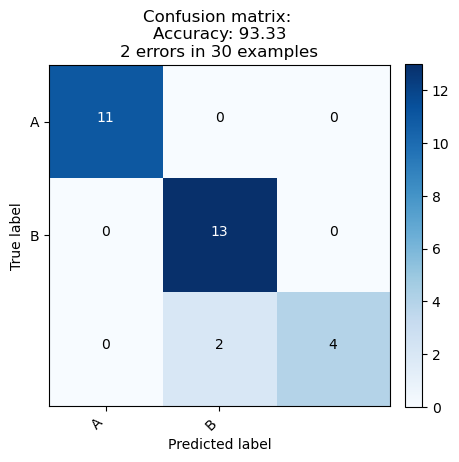

In [5]:
M = confusion_matrix(y_test, predictions)
    
# Calculate number of errors and create the description strings
a = "%d errors in %d examples" % (np.sum(y_test != predictions), y_test.shape[0])
b = "Accuracy: " + str(round(100 - np.sum(y_test != predictions) * 100 / y_test.shape[0], 2))

figsize_val = 4.5  # Customize the size if needed
classes_in = ['A', 'B']  # Adjust the class names if necessary
plot_confusion_matrix(M, classes=classes_in, figsize_val=figsize_val, title='Confusion matrix: ' + '\n' + str(b) + '\n' + str(a))

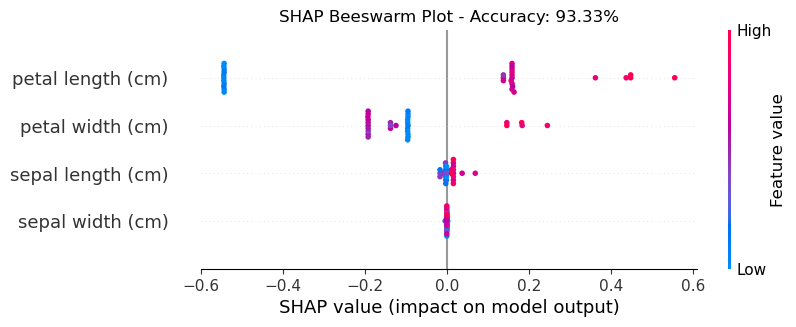

In [6]:
# Create a beeswarm plot with the accuracy in the title
plt.title(f"SHAP Beeswarm Plot - Accuracy: {accuracy * 100:.2f}%")
shap.plots.beeswarm(shap_values)
plt.show()

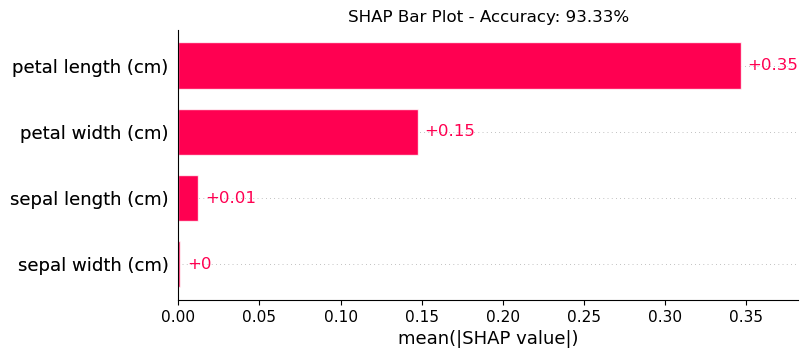

In [7]:
# Create a bar plot with the accuracy in the title
plt.title(f"SHAP Bar Plot - Accuracy: {accuracy * 100:.2f}%")
shap.plots.bar(shap_values)
plt.show()

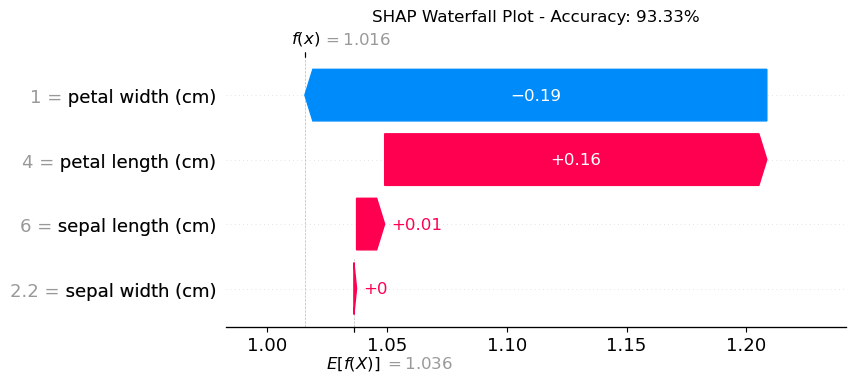

In [8]:
# Create a waterfall plot with the accuracy in the title
plt.title(f"SHAP Waterfall Plot - Accuracy: {accuracy * 100:.2f}%")
shap.plots.waterfall(shap_values[1])
plt.show()

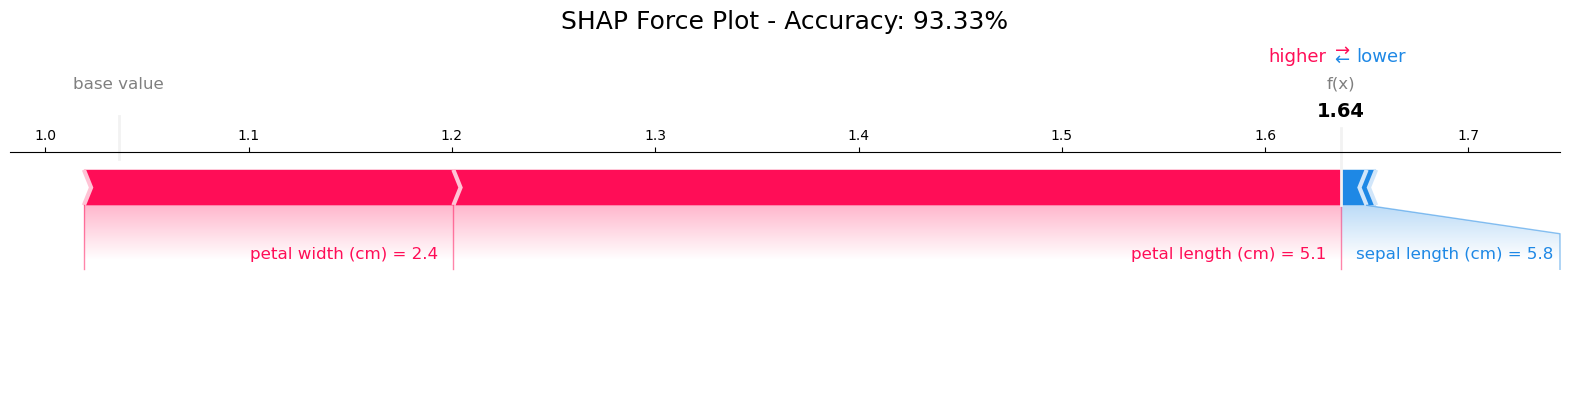

In [9]:
# Create a force plot with the accuracy in the title
shap.plots.force(shap_values[0], matplotlib=True, feature_names=feature_names, show=False)
plt.title(f"SHAP Force Plot - Accuracy: {accuracy * 100:.2f}%", y=1.5, fontsize=18)
plt.show()

In [10]:
# Initialize JavaScript visualization in Jupyter (for interactive plots)
shap.plots.initjs()

# Display a custom centered HTML title above the force plot
display(HTML(f"<h3 style='text-align: center;'>SHAP Force Plot -  Accuracy: {accuracy * 100:.2f}%</h3>"))

# Visualize all the training set predictions with a force plot
shap.plots.force(shap_values[:100], feature_names=feature_names)

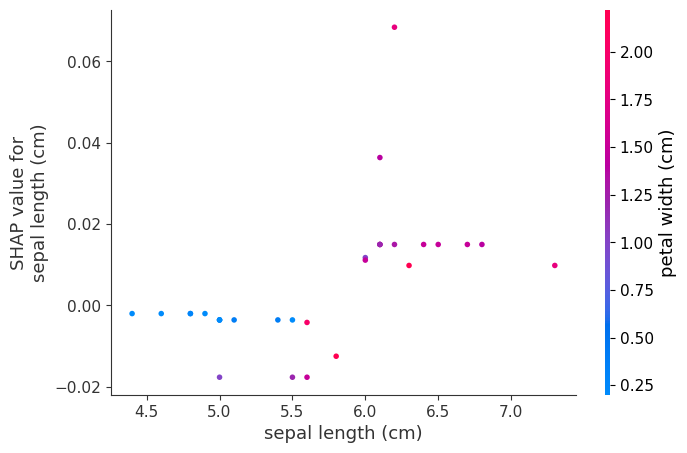

In [11]:
shap.dependence_plot(0, shap_values.values, X_test, feature_names=feature_names)
plt.show()

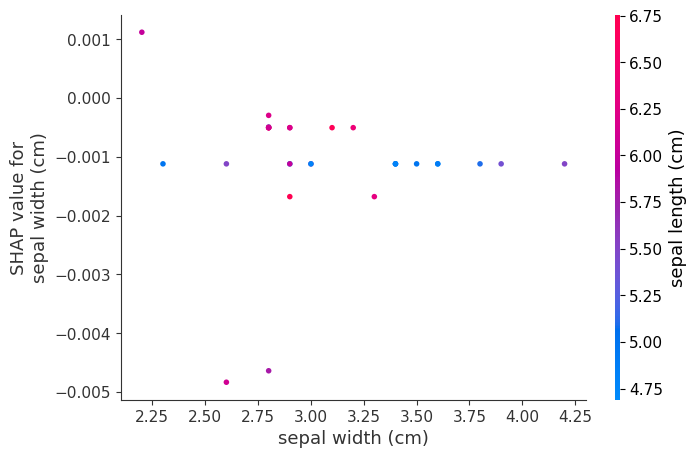

In [12]:
shap.dependence_plot(1, shap_values.values, X_test, feature_names=feature_names)
plt.show()

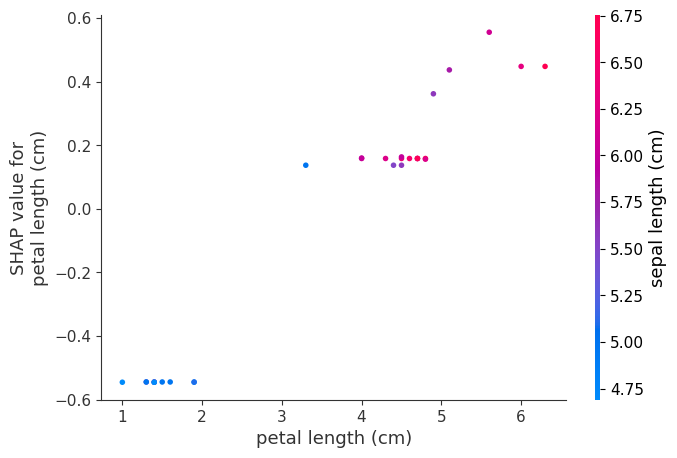

In [29]:
shap.dependence_plot(2, shap_values.values, X_test, feature_names=feature_names)
plt.show()

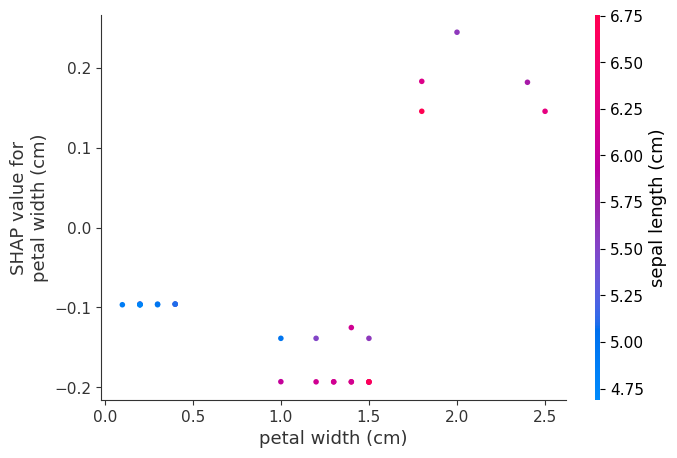

In [30]:
shap.dependence_plot(3, shap_values.values, X_test, feature_names=feature_names)
plt.show()

In [43]:
# train the model
model = ExplainableBoostingClassifier(interactions=0)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)

# make a prediction
predictions = model.predict(X_test)
print(score)

0.9666666666666667


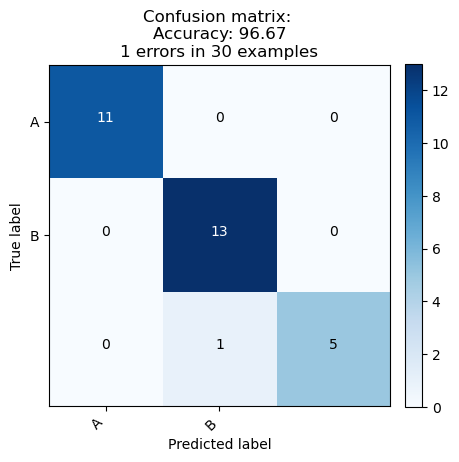

In [44]:
M = confusion_matrix(y_test, predictions)
    
# Calculate number of errors and create the description strings
a = "%d errors in %d examples" % (np.sum(y_test != predictions), y_test.shape[0])
b = "Accuracy: " + str(round(100 - np.sum(y_test != predictions) * 100 / y_test.shape[0], 2))

figsize_val = 4.5  # Customize the size if needed
classes_in = ['A', 'B']  # Adjust the class names if necessary
plot_confusion_matrix(M, classes=classes_in, figsize_val=figsize_val, title='Confusion matrix: ' + '\n' + str(b) + '\n' + str(a))

In [45]:
show(model.explain_global())

<!-- http://127.0.0.1:7001/1436702544080/ -->

https://interpret.ml/docs/ebm.html

In [46]:
show(model.explain_local(X_test[:5], y_test[:5]), 0)

<!-- http://127.0.0.1:7001/1436705713104/ -->

In [40]:
dt = ClassificationTree(random_state=1)
dt.fit(X_train, y_train)
score = dt.score(X_test, y_test)

# make a prediction
print(score)
dt_global = dt.explain_global()
predictions = dt.predict(X_test)

0.9666666666666667


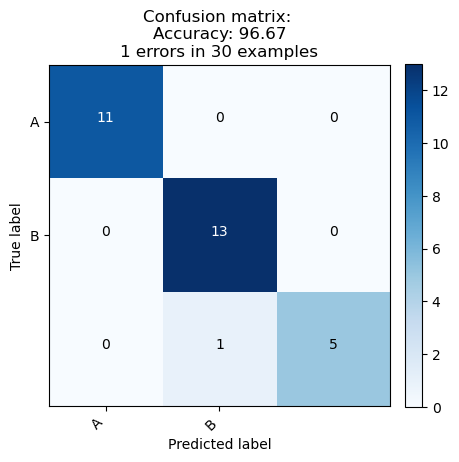

In [41]:
M = confusion_matrix(y_test, predictions)
    
# Calculate number of errors and create the description strings
a = "%d errors in %d examples" % (np.sum(y_test != predictions), y_test.shape[0])
b = "Accuracy: " + str(round(100 - np.sum(y_test != predictions) * 100 / y_test.shape[0], 2))

figsize_val = 4.5  # Customize the size if needed
classes_in = ['A', 'B']  # Adjust the class names if necessary
plot_confusion_matrix(M, classes=classes_in, figsize_val=figsize_val, title='Confusion matrix: ' + '\n' + str(b) + '\n' + str(a))

In [42]:
show(dt_global)

dt_local = dt.explain_local(X_test[:50], y_test[:50])
show(dt_local)

<!-- http://127.0.0.1:7001/1436692227024/ -->

<!-- http://127.0.0.1:7001/1436692366736/ -->